<a href="https://colab.research.google.com/github/rekka69/JPDB-JLPT-Frequency/blob/main/JLPT_Frequency_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests

In [3]:
from google.colab import userdata
APIKey = userdata.get('jpdbAPI')

In [4]:
import requests


url = "https://jpdb.io/api/v1/deck/list-vocabulary"

payload = {
    "id": 5, # deck id, you can find in the link of deck page
    "fetch_occurences": False
}
headers = {
    "Content-Type": "application/json",
    "Accept": "application/json",
    "Authorization": f"Bearer {APIKey}"
}

response = requests.post(url, json=payload, headers=headers)

tango = [response.json()][0]['vocabulary']

print(tango)

[[1169090, 78874875], [1310530, 1954345640], [1443670, 3383324333], [1212350, 163985936], [1366720, 3578031653], [2412900, 1829906060], [1543220, 3626104814], [1090540, 2886851224], [2010790, 2595135507], [1117080, 3269782713], [1222060, 1978712873], [1402430, 326905331], [1560050, 4283968733], [1764050, 1819070259], [2102790, 1846612575], [1354650, 1808344125], [1806840, 442032498], [2570660, 1355256323], [1592230, 2874376437], [1360860, 2406045424], [1482420, 1831214105], [1490210, 2291949449], [1401470, 1822907780], [1430180, 4026727215], [2210240, 1715059917], [2092070, 1903723429], [2052070, 3398591551], [1223500, 2068163962], [1589090, 1225064859], [1415410, 1301815449], [2008120, 2303093620], [1956940, 947749822], [1471750, 1120199717], [2270620, 2635307579], [1454230, 3303426555], [1726210, 2977089306], [1409140, 3681236780], [1460180, 2450723776], [1239570, 687919640], [1135470, 1750824391], [1577150, 698119956], [1225490, 1159681637], [1347640, 1755600290], [1115900, 15064574

In [14]:

url = "https://jpdb.io/api/v1/lookup-vocabulary"

payload = {
    "list": tango,
    "fields": ["spelling"]
}


response = requests.post(url, json=payload, headers=headers)

corpus = [response.json()][0]['vocabulary_info']

print(corpus)
print(len(corpus))

[['引き抜く'], ['枝'], ['電動'], ['感興'], ['人垣'], ['理'], ['予知'], ['ナノ・セカンド'], ['軽んずる'], ['プログラム'], ['気休め'], ['走り回る'], ['ろじ'], ['地謡'], ['顔を突き合わせる'], ['乗じる'], ['外装'], ['畑仕事'], ['屈強'], ['心底'], ['盤'], ['病む'], ['総'], ['長老'], ['どうしたって'], ['寛政'], ['八大地獄'], ['貴顕'], ['収める'], ['第二次'], ['こっぴどい'], ['扮装'], ['馬鹿野郎'], ['させて頂く'], ['道端'], ['自若'], ['身体'], ['南極'], ['つぼね'], ['モニュメント'], ['何人も'], ['疑い'], ['将棋'], ['プラン'], ['同じく'], ['有事'], ['苦もなく'], ['放す'], ['伏せる'], ['克服'], ['集中力'], ['ってば'], ['オペラグラス'], ['行動を取る'], ['陶器'], ['悪影響'], ['朝'], ['お付き合い'], ['悦び'], ['分配'], ['扇ぐ'], ['廃校'], ['亀裂'], ['腸'], ['接触事故'], ['裔'], ['倒れる'], ['復讐'], ['背中合わせ'], ['遅れ馳せながら'], ['方針'], ['あまつさえ'], ['往々にして'], ['楽しみにする'], ['達人'], ['眉間'], ['までもない'], ['簡単'], ['揶揄'], ['ペット'], ['虚心'], ['次郎'], ['家格'], ['取り放題'], ['爪弾く'], ['槐'], ['容れる'], ['信仰心'], ['待ちに待つ'], ['しぎ'], ['総勢'], ['にゃー'], ['っぷり'], ['膨大'], ['嘘のよう'], ['悔いる'], ['本当'], ['全く'], ['下に'], ['角'], ['反'], ['敷居'], ['原住民'], ['吸う'], ['辛抱強い'], ['身を寄せ合う'], ['三代'], ['沈め'], ['遮断'], ['近寄る'], ['発熱'], ['放火'], ['悪鬼

In [ ]:
# Download the files
# https://github.com/stephenmk/yomitan-jlpt-vocab/tree/main/original_data
!wget https://raw.githubusercontent.com/stephenmk/yomitan-jlpt-vocab/refs/heads/main/original_data/n1.csv
!wget https://raw.githubusercontent.com/stephenmk/yomitan-jlpt-vocab/refs/heads/main/original_data/n2.csv
!wget https://raw.githubusercontent.com/stephenmk/yomitan-jlpt-vocab/refs/heads/main/original_data/n3.csv
!wget https://raw.githubusercontent.com/stephenmk/yomitan-jlpt-vocab/refs/heads/main/original_data/n4.csv
!wget https://raw.githubusercontent.com/stephenmk/yomitan-jlpt-vocab/refs/heads/main/original_data/n5.csv

In [7]:
# prompt: Download these files and import them as one dataframe, add a column that indicates has the filename so all words found in n1.csv are filtered by column level with value n1
# https://raw.githubusercontent.com/stephenmk/yomitan-jlpt-vocab/refs/heads/main/original_data/n1.csv
# https://raw.githubusercontent.com/stephenmk/yomitan-jlpt-vocab/refs/heads/main/original_data/n2.csv
# https://raw.githubusercontent.com/stephenmk/yomitan-jlpt-vocab/refs/heads/main/original_data/n3.csv
# https://raw.githubusercontent.com/stephenmk/yomitan-jlpt-vocab/refs/heads/main/original_data/n4.csv
# https://raw.githubusercontent.com/stephenmk/yomitan-jlpt-vocab/refs/heads/main/original_data/n5.csv

import pandas as pd

# Create a list to store the dataframes
dfs = []

# Read each CSV file into a dataframe and add a source column
for level in ['n1', 'n2', 'n3', 'n4', 'n5']:
    df = pd.read_csv(f'{level}.csv')
    df['level'] = level  # Add the source column
    dfs.append(df)

# Concatenate the dataframes
jlpt_df = pd.concat(dfs, ignore_index=True)
jlpt_df['level'] = jlpt_df['level'].str.upper()
# Display the combined dataframe (optional)
jlpt_df.head()


,jmdict_seq,kana,kanji,waller_definition,level
0,1565440.0,ああ,嗚呼,"Ah!, Oh!, Alas!",N1
1,1400800.0,あい,相,"together, mutually, fellow",N1
2,1401310.0,あいかわらず,相変わらず,"as ever, as usual, the same",N1
3,1575660.0,あいそ,愛想,"civility, courtesy, compliments, sociability, ...",N1
4,1401100.0,あいたい,相対,"confrontation, facing, between ourselves, no t...",N1


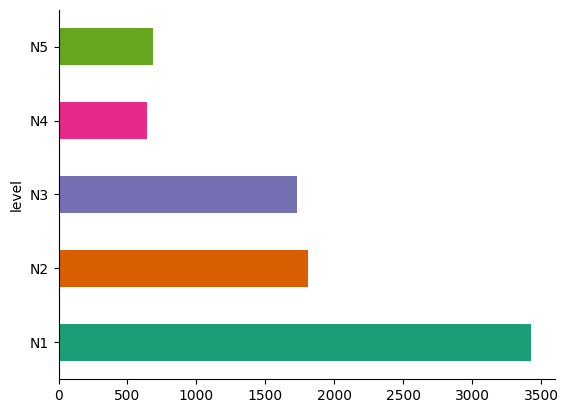

In [8]:
# @title level

from matplotlib import pyplot as plt
import seaborn as sns
jlpt_df.groupby('level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# using ハッシュマップ

In [9]:
# leave only one spelling, might add the check for both kana and kanji for ateji but this needs more testing than my 3AM mania episode and I might not use that again
jlpt_df['spelling'] = jlpt_df['kanji'].fillna(jlpt_df['kana'])
jlpt_df = jlpt_df.drop(columns=['kanji', 'kana'])
jlpt_df
# this will error if ran more than once since the columns will be removed, you can run the cell that creates df in case you're testing

,jmdict_seq,waller_definition,level,spelling
0,1565440.0,"Ah!, Oh!, Alas!",N1,嗚呼
1,1400800.0,"together, mutually, fellow",N1,相
2,1401310.0,"as ever, as usual, the same",N1,相変わらず
3,1575660.0,"civility, courtesy, compliments, sociability, ...",N1,愛想
4,1401100.0,"confrontation, facing, between ourselves, no t...",N1,相対
...,...,...,...,...
8288,1444610.0,to hand over,N5,渡す
8289,1444680.0,to go across,N5,渡る
8290,1151260.0,bad,N5,悪い
8291,1013190.0,Used for comparison.,N5,より


In [10]:
# ハッシュマップの実際の使用だよね～
from collections import defaultdict

# Create lookup dictionary from jlpt_df (spelling -> level)
jlpt_lookup = dict(zip(jlpt_df['spelling'], jlpt_df['level']))

corpus_hash = {item[0] for item in corpus}

# Build corpus dictionary with level/N0
corpus_levels = {word: jlpt_lookup.get(word, "N0") for word in corpus_hash}

corpus_levels
# some very common words are categorised as n0 because they are not in jlpt, might add another frequency lists later

{'物色': 'N0',
 '画竜点睛': 'N0',
 'アドバイス': 'N0',
 '霊送り': 'N0',
 '所有': 'N0',
 '揺るがす': 'N0',
 '教頭': 'N0',
 '白無垢': 'N0',
 '決戦': 'N0',
 '見繕う': 'N0',
 '痛み分け': 'N0',
 '血の道': 'N0',
 'しゃがむ': 'N2',
 '砲口': 'N0',
 '伝わる': 'N2',
 '根幹': 'N0',
 '溢れ返る': 'N0',
 '昼休み': 'N4',
 '伝奇小説': 'N0',
 '爆破': 'N1',
 '置きに': 'N0',
 '定期的': 'N0',
 'どつく': 'N0',
 '大洪水': 'N0',
 '未曾有': 'N0',
 '安住': 'N0',
 '最後の最後': 'N0',
 '間接的': 'N0',
 '一同': 'N1',
 '一朝': 'N0',
 'みすぼらしい': 'N0',
 '筆頭': 'N0',
 '鐘の音': 'N0',
 '背部': 'N0',
 '手立て': 'N0',
 '墓碑': 'N0',
 '気分': 'N4',
 '富士山': 'N0',
 'スカイ': 'N0',
 '行方を晦ます': 'N0',
 '何千': 'N0',
 'における': 'N0',
 '煮え立つ': 'N0',
 '手袋': 'N4',
 '緩やか': 'N1',
 '待ちに待つ': 'N0',
 '星': 'N4',
 '露見': 'N0',
 '杭': 'N0',
 '血痕': 'N0',
 '腕': 'N4',
 '売り渡す': 'N0',
 '眼窩': 'N0',
 '心理状態': 'N0',
 'ケンケン': 'N0',
 '慌てる': 'N1',
 '糞戯け': 'N0',
 '下衣': 'N0',
 'ワークス': 'N0',
 '如かず': 'N0',
 'のぼせる': 'N0',
 '散開': 'N0',
 '栄華': 'N0',
 '弱味': 'N0',
 '面目丸潰れ': 'N0',
 '首領': 'N0',
 'メニュー': 'N2',
 '歓待': 'N0',
 '宣言': 'N1',
 '充填': 'N0',
 '一': 'N5',
 '様方': 'N0',


In [ ]:
!wget https://github.com/notofonts/noto-cjk/raw/refs/heads/main/google-fonts/NotoSansJP%5Bwght%5D.ttf

In [12]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('NotoSansJP[wght].ttf')
mpl.rc('font', family='Noto Sans JP')


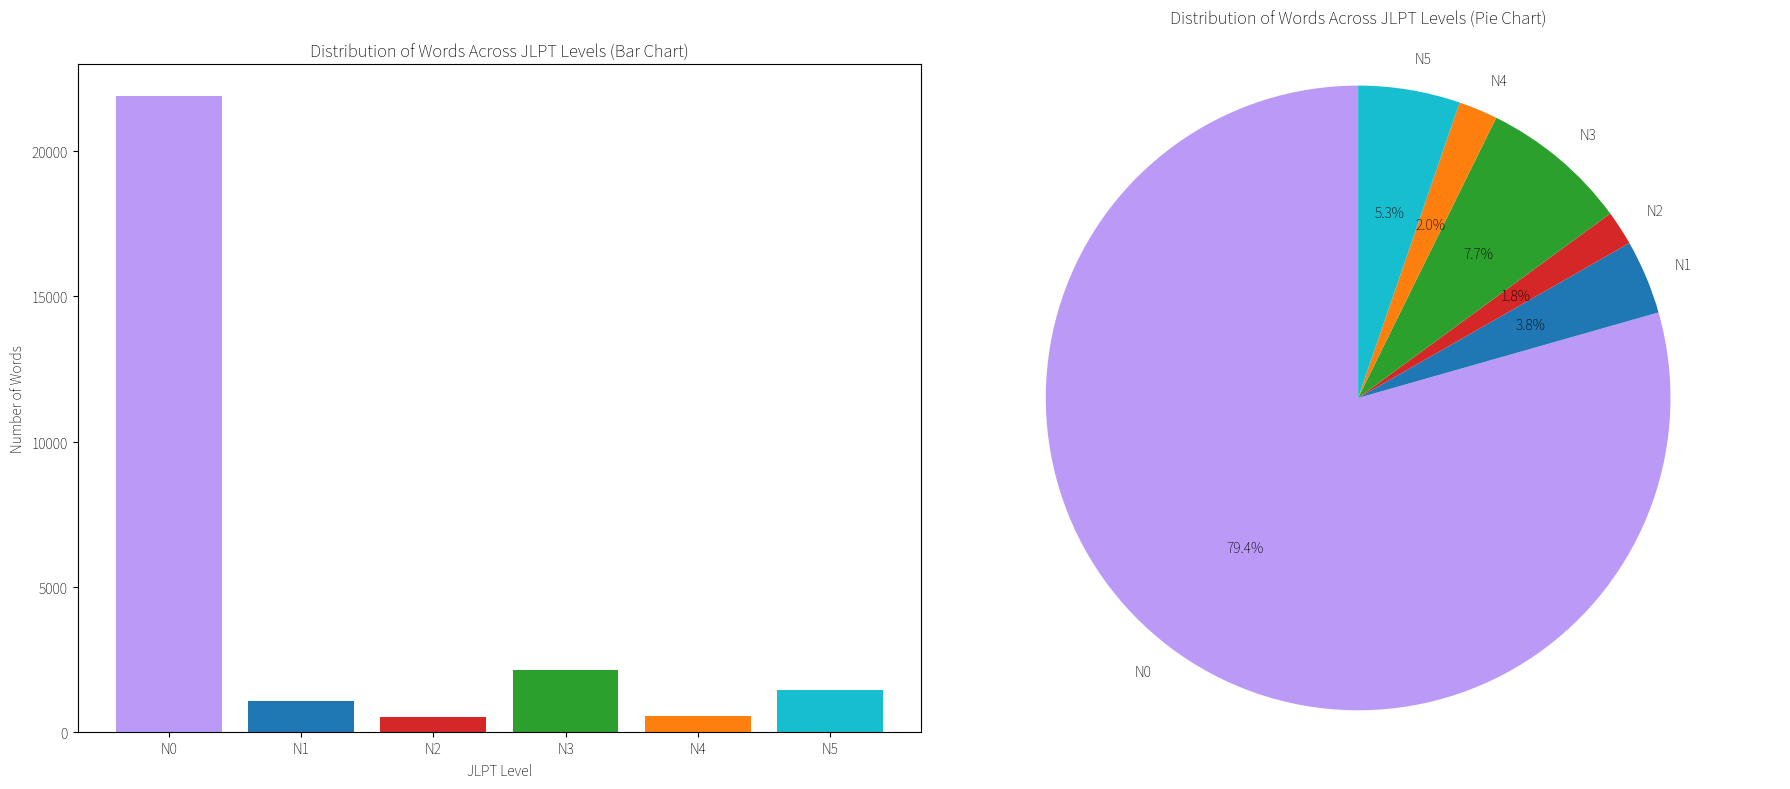

In [18]:
# prompt: using corpus_levels generate a stacked bar chart

import matplotlib.pyplot as plt
from collections import Counter

# Assuming corpus_levels is defined as in the previous code

level_counts = Counter(corpus_levels.values())

levels = list(level_counts.keys())
counts = list(level_counts.values())


level_order = list(['N0', 'N1', 'N2', 'N3', 'N4', 'N5'])

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # Adjust figsize as needed

# Bar chart on the left (ax1)
ax1.bar(level_order, counts, color=['#bb9af7','#1f77b4', '#d62728', '#2ca02c', '#ff7f0e', '#17becf'])
ax1.set_xlabel("JLPT Level")
ax1.set_ylabel("Number of Words")
ax1.set_title("Distribution of Words Across JLPT Levels (Bar Chart)")

# Pie chart on the right (ax2)
ax2.pie(counts, labels=level_order, autopct='%1.1f%%', startangle=90, colors=['#bb9af7', '#1f77b4', '#d62728', '#2ca02c', '#ff7f0e', '#17becf'])
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Distribution of Words Across JLPT Levels (Pie Chart)", pad=30)

# Adjust layout and display
plt.tight_layout()  # Prevents overlapping of subplots
plt.show()

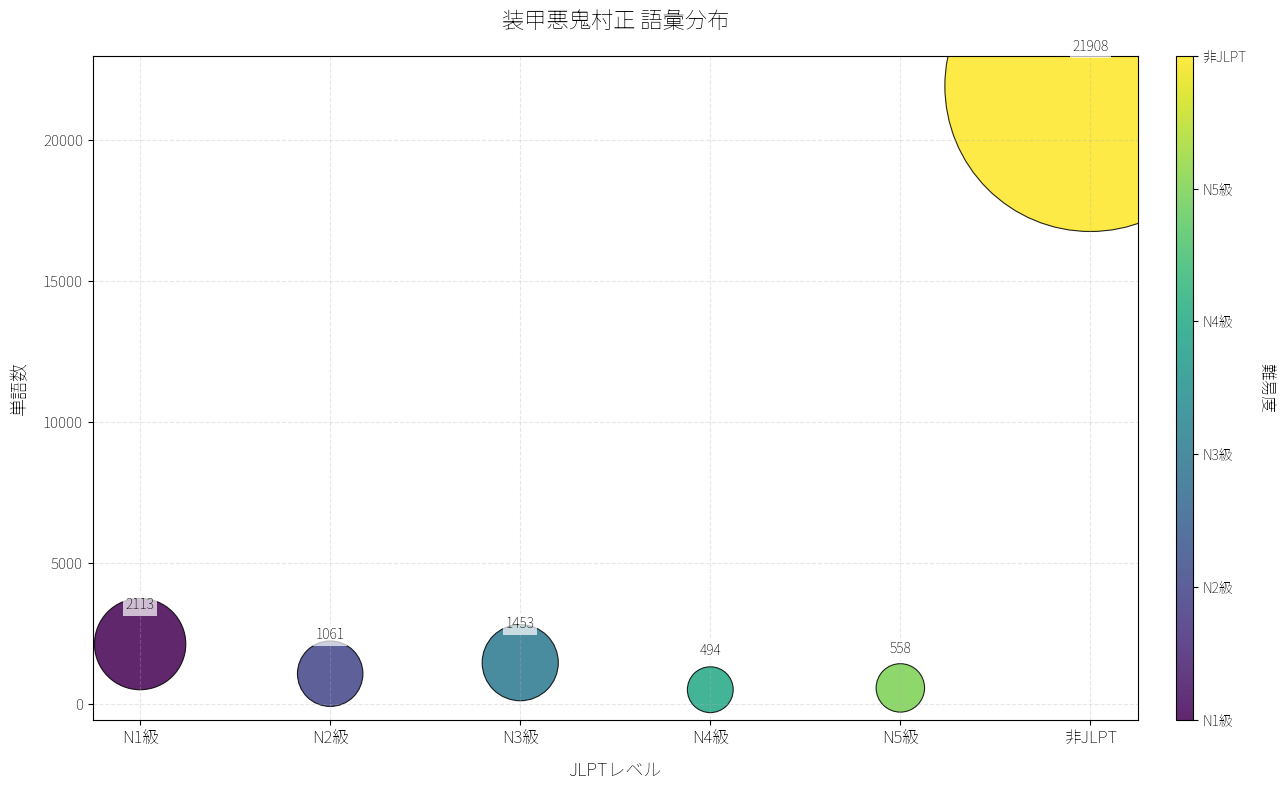

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Set Japanese font (choose one that works on your system)


# Convert corpus_levels to level counts
level_counts = Counter(corpus_levels.values())

# Create DataFrame with Japanese labels
jlpt_order = ['N1', 'N2', 'N3', 'N4', 'N5', 'N0']
jlpt_japanese = ['N1級', 'N2級', 'N3級', 'N4級', 'N5級', '非JLPT']  # Japanese labels

df = pd.DataFrame({
    'level': list(level_counts.keys()),
    'count': list(level_counts.values())
}).set_index('level').reindex(jlpt_order, fill_value=0).reset_index()

# Map levels to numerical values
level_to_num = {level: i for i, level in enumerate(jlpt_order)}
df['level_num'] = df['level'].map(level_to_num)

# Create larger figure with adjusted margins
plt.figure(figsize=(14, 8), dpi=100)
plt.subplots_adjust(left=0.5, right=0.9, top=0.9, bottom=0.15)  # Zoomed out margins

# Plot with enhanced styling
scatter = plt.scatter(
    x=df['level_num'],
    y=df['count'],
    s=df['count']*2 + 100,  # More moderate bubble sizing
    c=df['level_num'],
    alpha=0.85,
    edgecolors='black',
    linewidth=0.8
)

# Customize axes with Japanese
plt.xticks(ticks=range(len(jlpt_order)), labels=jlpt_japanese, fontsize=12)
plt.yticks(fontsize=11)
plt.xlabel('JLPTレベル', fontsize=13, labelpad=10)
plt.ylabel('単語数', fontsize=13, labelpad=10)
plt.title('装甲悪鬼村正 語彙分布', fontsize=16, pad=20)

# Annotations with adjusted positioning
for i, row in df.iterrows():
    plt.text(
        x=row['level_num'],
        y=row['count'] + max(df['count'])*0.05,
        s=f"{row['count']}",
        ha='center',
        va='bottom',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.7, pad=2, edgecolor='none')
    )

# Enhanced grid and colorbar
plt.grid(True, linestyle='--', alpha=0.3)
cbar = plt.colorbar(scatter, aspect=40, pad=0.03)
cbar.set_label('難易度', rotation=270, labelpad=20, fontsize=12)
cbar.set_ticks(range(len(jlpt_order)))
cbar.set_ticklabels(jlpt_japanese)

plt.tight_layout()
plt.show()